# CVAE

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

import base
import cvae
import importlib
importlib.reload(cvae)

/home/levi/miniconda3/envs/ML/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'cvae' from '/home/levi/Desktop/mlgroup/market_simulator/notebooks/../src/cvae.py'>

## Create the data

In [2]:
data, conditions = make_circles(n_samples=10000, noise=0.05, factor=0.5)

# We normalise the data to [0, 1]^2
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [3]:
print(data.shape)
print(conditions.shape)

(10000, 2)
(10000,)


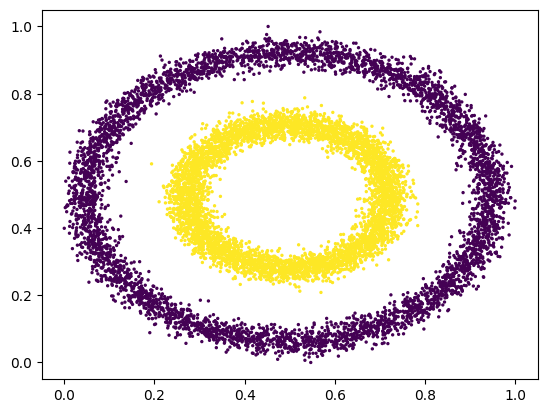

In [4]:
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()

# Train the CVAE

In [5]:
# tf systax
# generator = cvae.CVAE(n_latent=4, alpha=0.02)
# generator.train(data, data_cond=conditions.reshape(-1, 1),
#                 n_epochs=10000)
print(data.shape)
print(conditions.reshape(-1, 1).shape)
generator = cvae.CVAE(data=data,data_cond=conditions.reshape(-1, 1),latent_dim=4,alpha=0.02)
generator.train(n_epochs=10000)

(10000, 2)
(10000, 1)
Data shape:torch.Size([10000, 2])
Data condition shape:torch.Size([10000, 1])
Epoch 1: 1209.6998
saving model with loss 1209.6998
Epoch 2: 1206.2606
saving model with loss 1206.2606
Epoch 3: 1202.7367
saving model with loss 1202.7367
Epoch 4: 1200.2687
saving model with loss 1200.2687
Epoch 5: 1198.9081
saving model with loss 1198.9081
Epoch 6: 1197.3304
saving model with loss 1197.3304
Epoch 7: 1193.2917
saving model with loss 1193.2917
Epoch 8: 1190.9861
saving model with loss 1190.9861
Epoch 10: 1184.6527
saving model with loss 1184.6527
Epoch 11: 1184.5166
saving model with loss 1184.5166
Epoch 12: 1181.6215
saving model with loss 1181.6215
Epoch 13: 1176.8284
saving model with loss 1176.8284
Epoch 14: 1174.7460
saving model with loss 1174.7460
Epoch 15: 1158.2836
saving model with loss 1158.2836
Epoch 16: 1153.0326
saving model with loss 1153.0326
Epoch 17: 1143.6283
saving model with loss 1143.6283
Epoch 19: 1131.4751
saving model with loss 1131.4751
Epoch 2

KeyboardInterrupt: 

# Generate samples

In [ ]:
outer_circle_generated = generator.generate(cond=(0,), n_samples=1000)
inner_circle_generated = generator.generate(cond=(1,), n_samples=1000)

In [ ]:
print(outer_circle_generated.shape)
print(inner_circle_generated.shape)

torch.Size([1000, 2])
torch.Size([1000, 2])


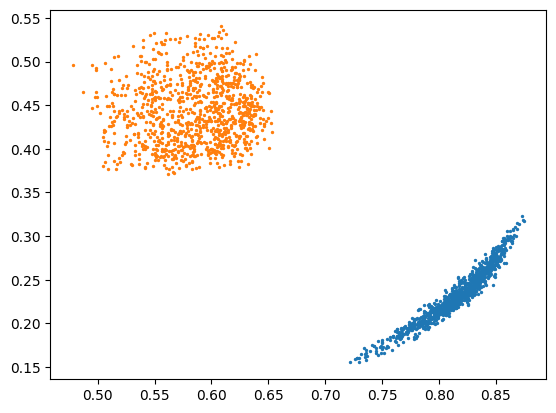

In [ ]:
plt.scatter(*outer_circle_generated.T, s=2)
plt.scatter(*inner_circle_generated.T, s=2)
plt.show()